### Installing packages

In [4]:
install.packages(c("ggplot2", "plyr", "readxl"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(ggplot2)

library(plyr)

library(readxl)

### Loading Dataset

Source: https://www.kaggle.com/nisargpatel/automobiles#Automobile.csv

In [3]:
auto_mobile <- read.csv("datasets/Automobile.csv", header = TRUE)

In [4]:
head(auto_mobile, 5)

symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [5]:
dim(auto_mobile)

[1] 201  26

In [6]:
colnames(auto_mobile)

[1] "symboling"           "normalized_losses"   "make"               
 [4] "fuel_type"           "aspiration"          "number_of_doors"    
 [7] "body_style"          "drive_wheels"        "engine_location"    
[10] "wheel_base"          "length"              "width"              
[13] "height"              "curb_weight"         "engine_type"        
[16] "number_of_cylinders" "engine_size"         "fuel_system"        
[19] "bore"                "stroke"              "compression_ratio"  
[22] "horsepower"          "peak_rpm"            "city_mpg"           
[25] "highway_mpg"         "price"

In [7]:
auto_mobile[ ,c("symboling", "make", "body_style")] <- list(NULL)

In [8]:
dim(auto_mobile)

[1] 201  23

In [9]:
head(auto_mobile, 5)

normalized_losses,fuel_type,aspiration,number_of_doors,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
168,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
164,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
164,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [10]:
colSums(is.na(auto_mobile))

normalized_losses           fuel_type          aspiration     number_of_doors 
                  0                   0                   0                   0 
       drive_wheels     engine_location          wheel_base              length 
                  0                   0                   0                   0 
              width              height         curb_weight         engine_type 
                  0                   0                   0                   0 
number_of_cylinders         engine_size         fuel_system                bore 
                  0                   0                   0                   0 
             stroke   compression_ratio          horsepower            peak_rpm 
                  0                   0                   0                   0 
           city_mpg         highway_mpg               price 
                  0                   0                   0

In [11]:
str(auto_mobile)

'data.frame':	201 obs. of  23 variables:
 $ normalized_losses  : int  168 168 168 164 164 161 158 168 158 192 ...
 $ fuel_type          : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration         : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ number_of_doors    : Factor w/ 2 levels "four","two": 2 2 2 1 1 2 1 1 1 2 ...
 $ drive_wheels       : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine_location    : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel_base         : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length             : num  169 169 171 177 177 ...
 $ width              : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height             : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb_weight        : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine_type        : Factor w/ 6 levels "dohc","l","ohc",..: 1 1 5 3 3 3 3 3 3 3 ...
 $ number_of_cylinders:

In [12]:
unique(auto_mobile$fuel_type)

[1] gas    diesel
Levels: diesel gas

In [13]:
table(auto_mobile$fuel_type)


diesel    gas 
    20    181 

In [14]:
table(auto_mobile$aspiration)


  std turbo 
  165    36 

In [15]:
table(auto_mobile$number_of_doors)


four  two 
 114   87 

In [16]:
table(auto_mobile$number_of_cylinders)


 eight   five   four    six  three twelve    two 
     4     10    157     24      1      1      4 

In [17]:
options(repr.plot.width = 6, repr.plot.height = 5)

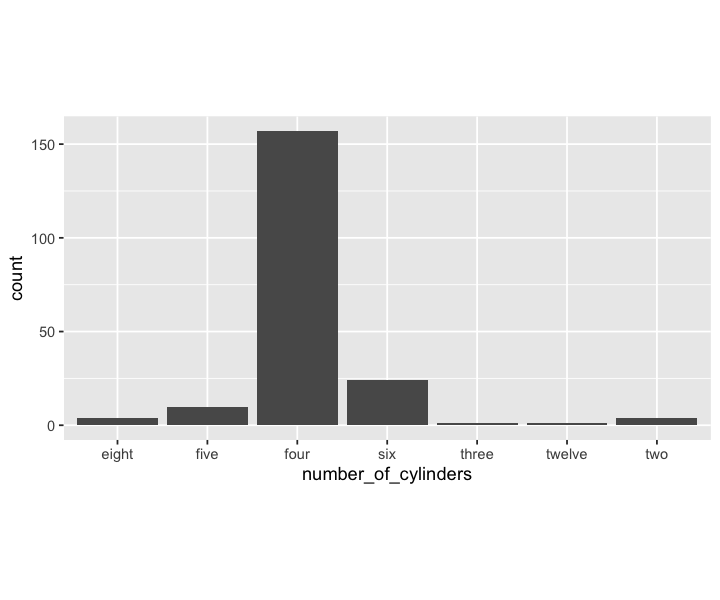

In [18]:
g <- ggplot(auto_mobile, aes(number_of_cylinders))

g + geom_bar() + theme(aspect.ratio = 0.5)

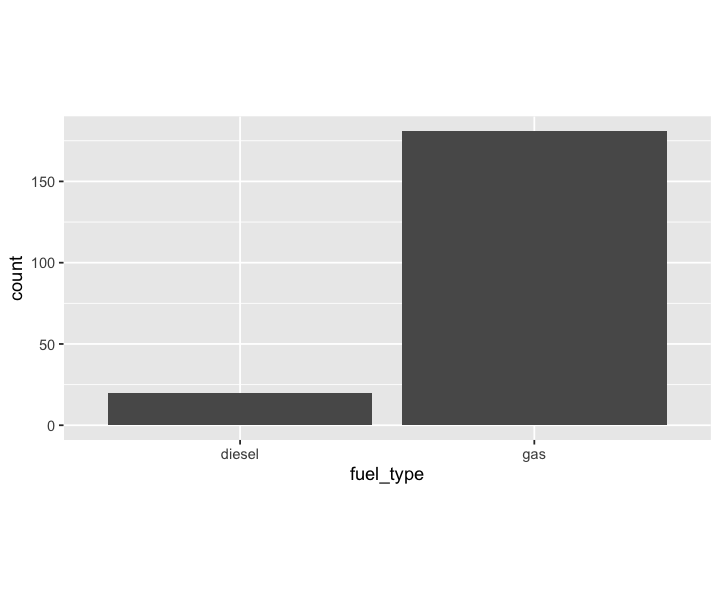

In [19]:
g <- ggplot(auto_mobile, aes(fuel_type))

g + geom_bar() + theme(aspect.ratio = 0.5)

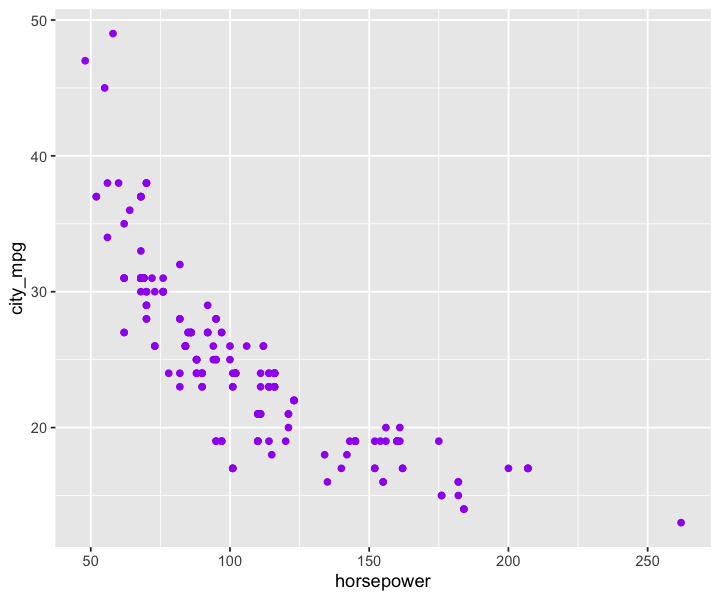

In [20]:
ggplot(auto_mobile, aes(x = horsepower, y = city_mpg)) + 
                        geom_point(col = 'purple')

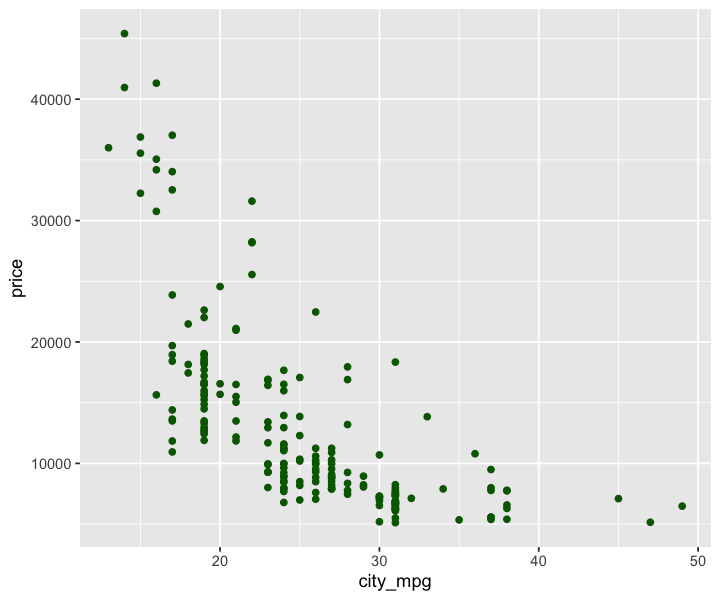

In [21]:
ggplot(auto_mobile, aes(x = city_mpg, y = price)) + 
                        geom_point(col = 'darkgreen')

#### Boxplot for price

https://www.rdocumentation.org/packages/graphics/versions/3.6.1/topics/boxplot

Here we can see that it has some outliers

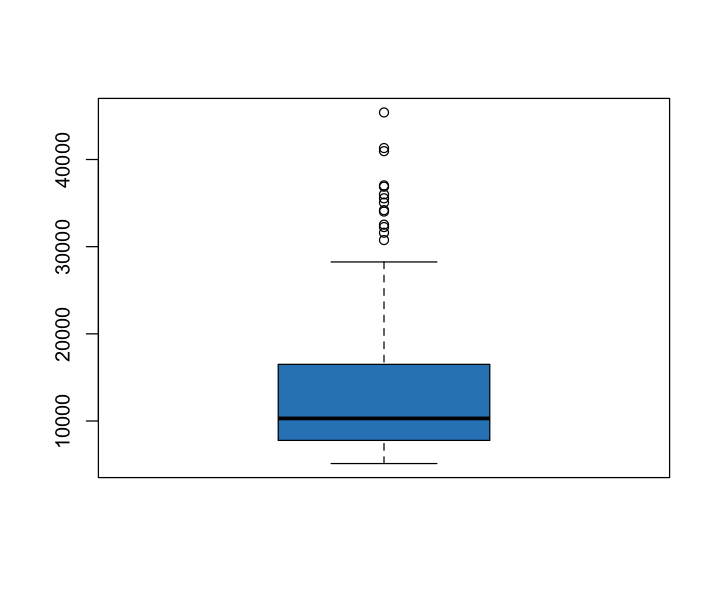

In [29]:
price_boxplot <- boxplot(auto_mobile$price, col = "#2E86C1")

List with the following components:

stats: A matrix, each column contains the extreme of the lower whisker, the lower hinge, the median, the upper hinge and the extreme of the upper whisker for one group/plot. If all the inputs have the same class attribute, so will this component.

n: A vector with the number of observations in each group.

conf: A matrix where each column contains the lower and upper extremes of the notch.

out: The values of any data points which lie beyond the extremes of the whiskers.

group: A vector of the same length as out whose elements indicate to which group the outlier belongs.

names: A vector of names for the groups.

In [30]:
price_boxplot

9322.646
11267.354


#### Printing outliers

In [31]:
price_boxplot$out

[1] 30760 41315 36880 32250 35550 36000 31600 34184 35056 40960 45400 32528
[13] 34028 37028

#### Removing outliers

In [32]:
auto_mobile <- auto_mobile[-which(auto_mobile$price %in% price_boxplot$out),]

In [33]:
dim(auto_mobile)

[1] 187  23

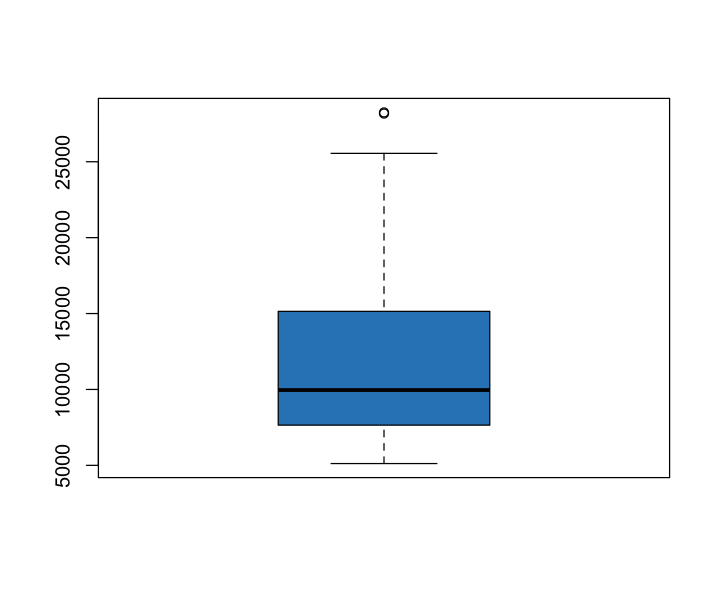

In [34]:
price_boxplot <- boxplot(auto_mobile$price, col = "#2E86C1")

In [35]:
price_boxplot

9093.904
10826.096


#### Saving processed dataset in csv fromat

In [36]:
write.csv(auto_mobile, file = "datasets/auto_mobiles_processed.csv", row.names = FALSE)

In [37]:
list.files(path = "datasets")

[1] "auto_mobiles_processed.csv" "Automobile.csv"            
[3] "blood_pressure.csv"